<a href="https://colab.research.google.com/github/Priyanka2709/MaterialLogin/blob/master/AeroFit_Scaler_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aerofit Project**

The **main aim** of this project is to **analyze customer purchase behavior** for different treadmill models sold by **Aerofit**, and to develop **customer profiles** that help the company make better **product recommendations** and **marketing decisions**.



**Load And Explore The Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Load Data**

In [2]:
df = pd.read_csv("aerofit_treadmill.txt")

# **Display Basic Info**

In [3]:
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (180, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Dataset Summary**

**Rows & Columns**

**Rows**: 180 entries (each row = one customer who purchased a treadmill)

**Columns**: 9 attributes per entry
(Product, Age, Gender, Education, Marital Status, Usage, Fitness, Income, Miles)

**Basic Analysis**

**1.Data Completeness**



*   All columns have complete data — no missing values.
*   This ensures the dataset is ready for analysis without needing imputation.

**2. Data Types**

**Numerical columns (6)**:Age, Education, Usage, Fitness, Income, Miles

**Categorical columns (3)**:Product, Gender, MaritalStatus
(Currently of type object — can be converted to category for optimization and visualization.)









**Display First 10 Rows**

In [4]:
df.head(10)

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
5,KP281,20,Female,14,Partnered,3,3,32973,66
6,KP281,21,Female,14,Partnered,3,3,35247,75
7,KP281,21,Male,13,Single,3,3,32973,85
8,KP281,21,Male,15,Single,5,4,35247,141
9,KP281,21,Female,15,Partnered,2,3,37521,85


In [5]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


**Check For Null And NaN Values**

In [6]:
# Check for missing (NaN) values in each column

df.isnull().sum()

,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


**Insight From The Dataset**


*   Zero missing values in all columns.
*   This means the dataset is complete and does not require imputation or cleaning for null values.





**Conversion Of Columns With Type Object To Category**

In [7]:
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Product        180 non-null    category
 1   Age            180 non-null    int64   
 2   Gender         180 non-null    category
 3   Education      180 non-null    int64   
 4   MaritalStatus  180 non-null    category
 5   Usage          180 non-null    int64   
 6   Fitness        180 non-null    int64   
 7   Income         180 non-null    int64   
 8   Miles          180 non-null    int64   
dtypes: category(3), int64(6)
memory usage: 9.5 KB


**Advantage Of Converting Columns From Object To Category Type:**



*   **Memory Efficiency**:Since these columns have a limited set of unique values, storing them as categories reduces memory usage — especially useful when working with larger datasets.

*   **Faster Processing**:Operations like grouping, filtering, and plotting become more efficient on categorical data.

*  **Better Semantic Meaning**:Categorical conversion clarifies that these fields are **nominal variables** (labels), not free-form text, which improves code readability and helps prevent incorrect statistical treatment.

*  **Improved Visualisa** : Libraries like Seaborn and Plotly handle category types more intuitively for plots such as **countplot**, **boxplot**, and **violinplot**





**Non Graphical Analysis**

**Value Counts for Categorical Columns**

In [8]:
# Product Purchased
print("Product Distribution:\n", df['Product'].value_counts())

# Gender Distribution
print("\nGender Distribution:\n", df['Gender'].value_counts())

# Marital Status Distribution
print("\nMarital Status Distribution:\n", df['MaritalStatus'].value_counts())


Product Distribution:
 Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

Gender Distribution:
 Gender
Male      104
Female     76
Name: count, dtype: int64

Marital Status Distribution:
 MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64


**Insights From Value Counts:**


*   The entry-level model KP281 is the most purchased treadmill, possibly due to its affordability.
*   There are more male buyers, suggesting a slightly male-dominant customer base.
*   A majority of buyers are partnered, indicating potential for joint or family fitness marketing.






**Recommendation:**

*  Promote **KP281** among budget-conscious first-time users (likely singles or younger customers).
*   Market **KP481/KP781** to **partnered couples** with higher incomes and shared fitness goals.





**Number of Unique Values in Each Column**

In [10]:
print("\nUnique values per column:")
print(df.nunique())


Unique values per column:
Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64


# **Univariate Analysis**

**Histogram**

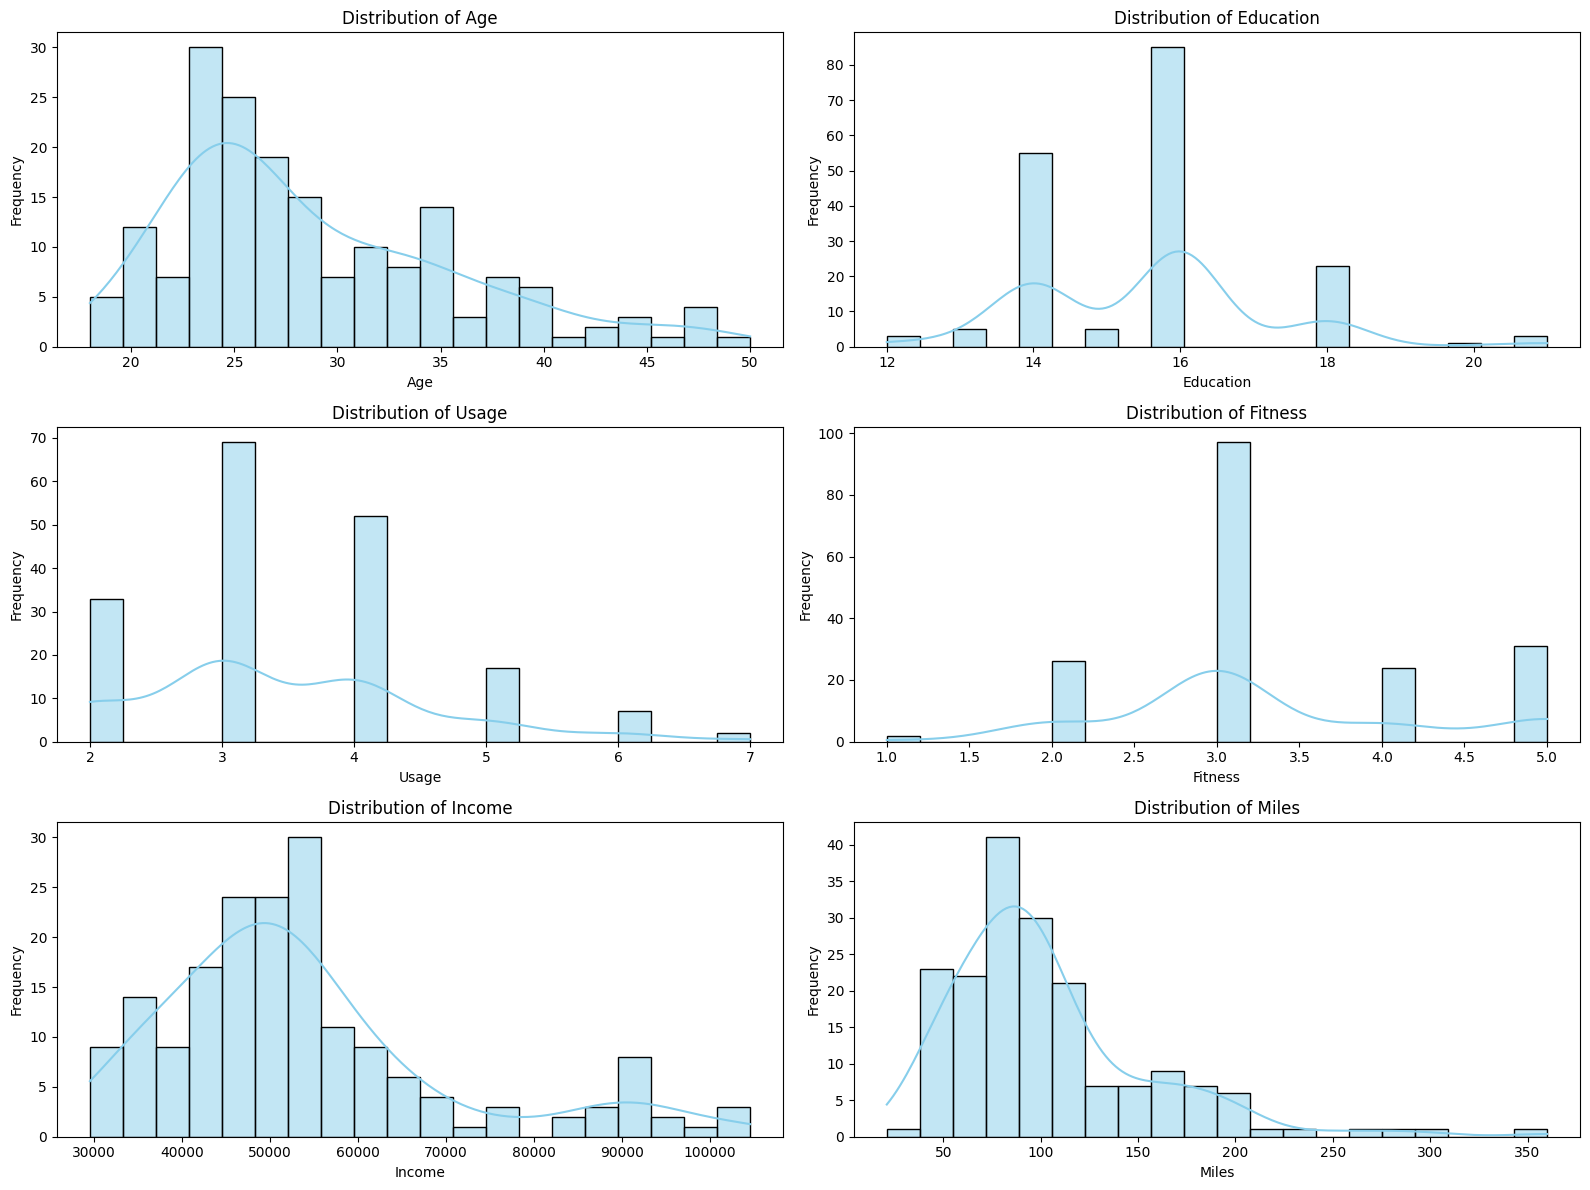

In [11]:
continuous_cols = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Plot histograms with KDE for each continuous variable
plt.figure(figsize=(16, 12))
for i, col in enumerate(continuous_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Univariate Analysis Insights**

**Distribution of Age**



*  The distribution is **right-skewed**, meaning most customers are **younger**.
*   A large proportion of customers fall in the **22–30 age range**, with a peak around **24–25 years**.
*   Very few customers are above **40 years**, indicating a target demographic of **younger adults**.


**Distribution of Education**



*   The majority of customers have around **16 years of education**, which typically corresponds to a **college graduate**.
*   Smaller peaks at **14 and 18 years** may represent high school and post-graduate levels.
*   Overall, Aerofit seems to attract **well-educated** customers.


**Distribution of Usage (times/week)**



*   Most users plan to use the treadmill **3 to 4 times per week**, peaking at **3**.
*   The distribution is slightly **left-skewed**, indicating a smaller group of **high-frequency users** (6–7 times/week).
*   The majority of Aerofit users are **moderate users**, not casual or intense fitness enthusiasts.


**Distribution of Fitness**



*  Clear peak at 3, suggesting most customers rate their fitness as **average**.
*  Secondary peaks at **2, 4, and 5** show variation, with some customers rating themselves higher or lower.

*  Very few rate their fitness as **1 (poor)**
*  Aerofit attracts a **moderately fit** customer base, with a mix of fitness levels.


**Distribution of Income**



*   The distribution is **slightly right-skewed**, centered around $45,000–$55,000.
*   Few high-income outliers go beyond $90,000–$100,000.
*   Very few buyers earn below $35,000.
*   Aerofit's customers are mostly from the **middle-income segment**, with some high earners — likely KP781 buyers.


**Distribution of Miles (expected weekly usage)**



*  Most customers expect to walk/run between **60 and 120 miles per week**, peaking around **90–100 miles**.
*  There are **extreme right outliers** (200–360 miles) suggesting intense usage by a few.
*  Aerofit users tend to be **consistent, moderate-distance users**, with some serious runners skewing the upper tail.





























# **Bivariate Analysis**

**Count Plots**

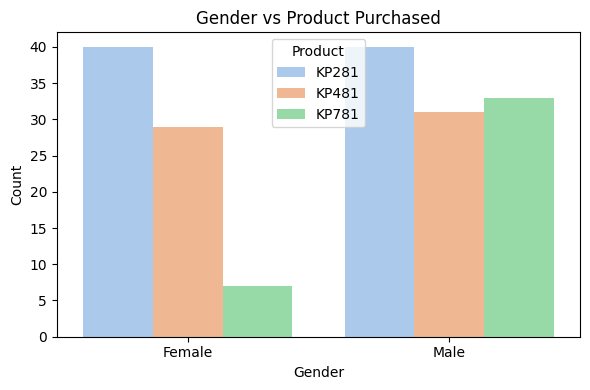

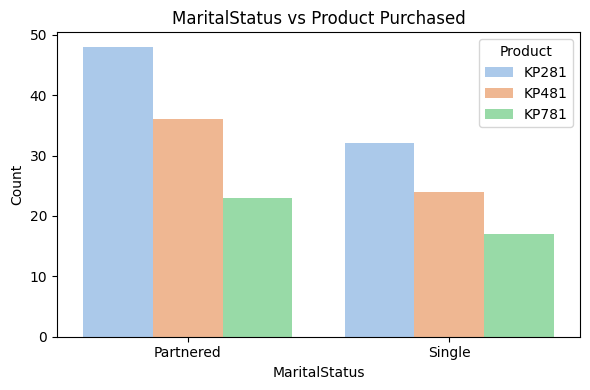

In [12]:
cat_cols = ['Gender', 'MaritalStatus']

# Countplot for each categorical variable vs Product
for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='Product', palette='pastel')
    plt.title(f'{col} vs Product Purchased')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Product')
    plt.tight_layout()
    plt.show()



**Insights: Categorical Features vs Product Purchased**

1. **Gender vs Product Purchased**


*   **KP281** is equally popular among both **males and females**, showing wide appeal across genders.
*   **KP781** has significantly **higher male preference** compared to females — almost 5x more males than females purchased this premium model.

*   **KP481** sees a fairly balanced distribution across both genders.

**Insight:** **High-end products like KP781 attract more male buyers**, possibly due to greater investment in fitness tech or performance features. KP281’s strong presence across both genders indicates its broad affordability.


2.**Marital Status vs Product Purchased**



*   **Partnered individuals** purchase more treadmills overall, with KP281 and KP481 leading.
*  KP281 is the top choice across both marital statuses, but it’s **more dominant among partnered customers**.
*   **KP781 shows relatively lower preference among single buyers**, implying it may be more appealing to dual-income or family users.

Insight: **Partnered customers are more likely to purchase premium or mid-tier models (KP481/KP781)**, possibly due to shared fitness goals or higher purchasing power. Singles lean more toward the budget-friendly KP281.










**For Categorical Variable**

**Outlier Detection**

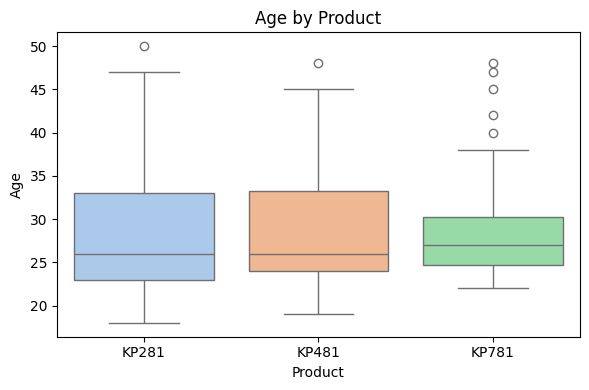

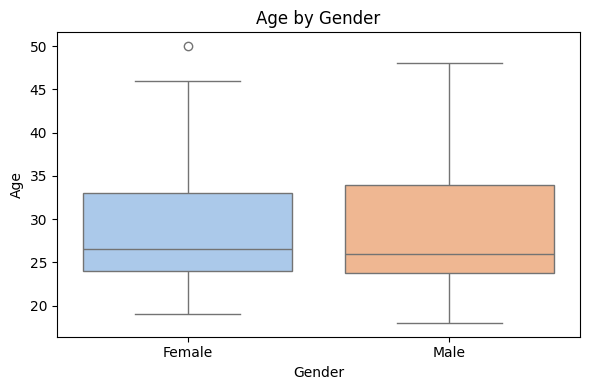

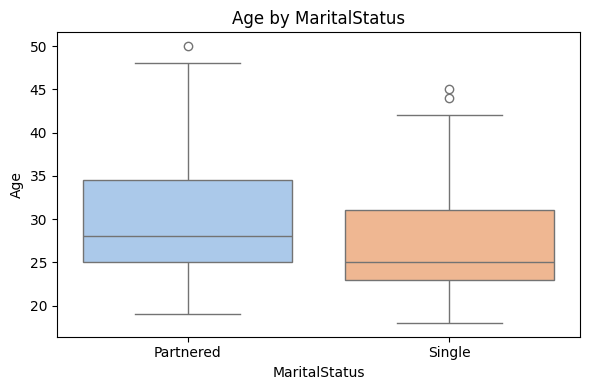

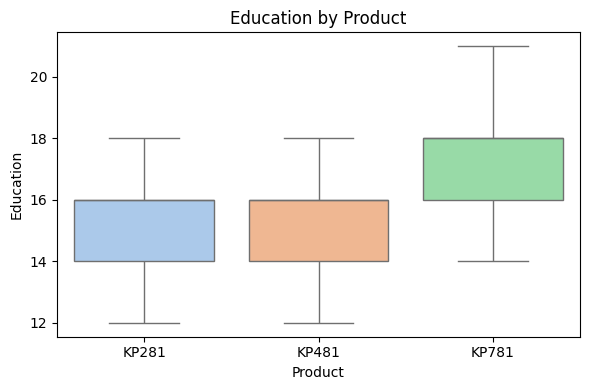

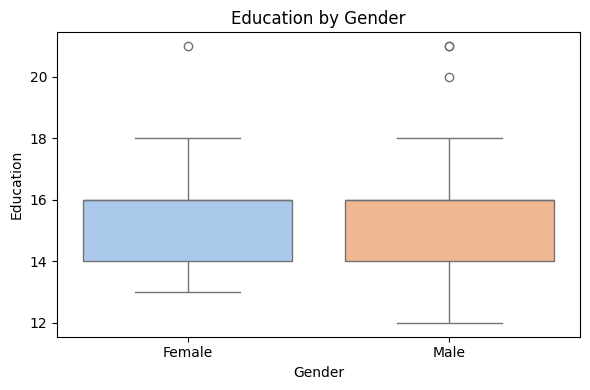

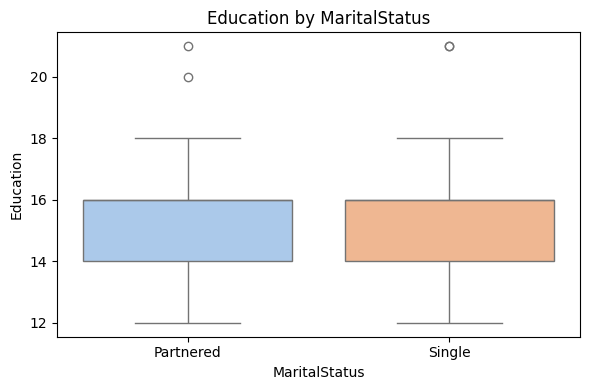

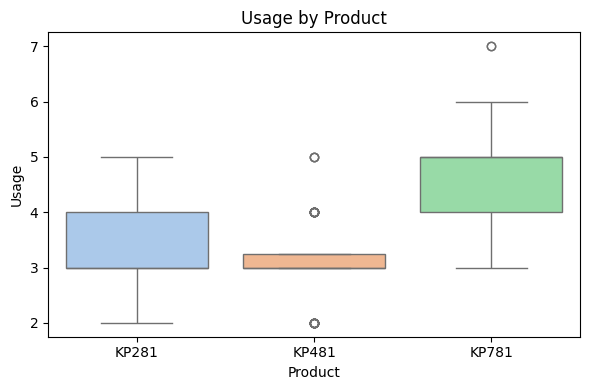

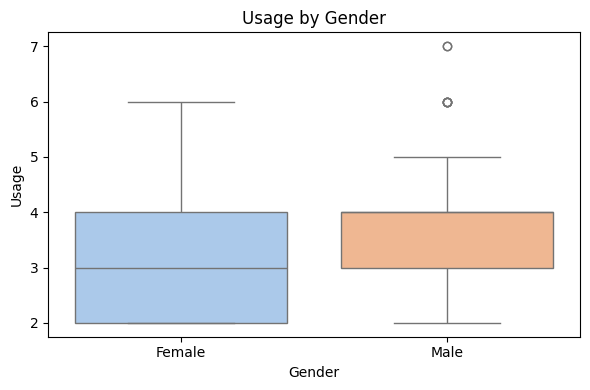

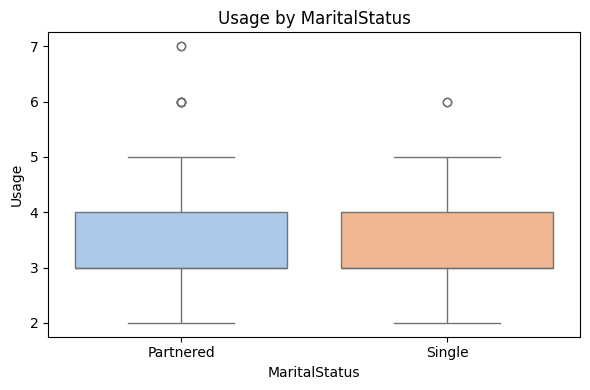

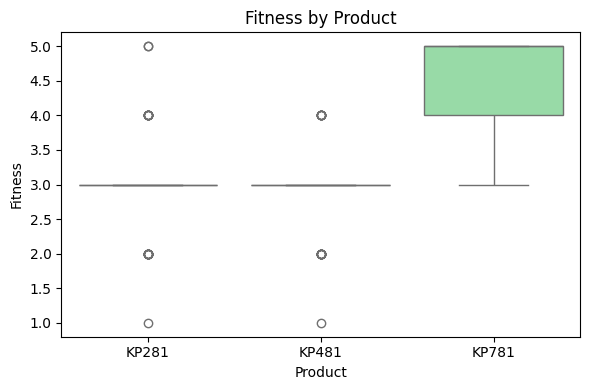

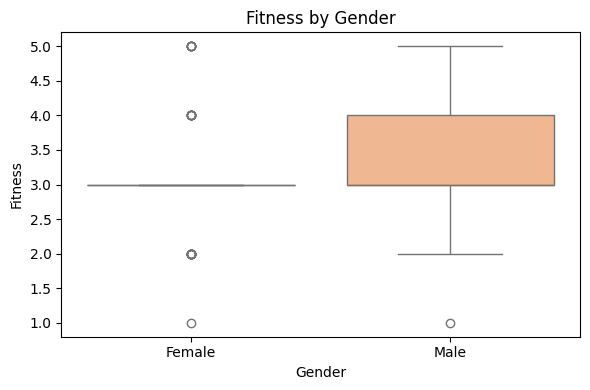

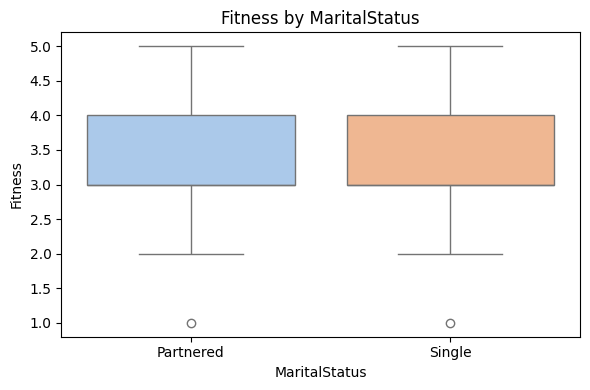

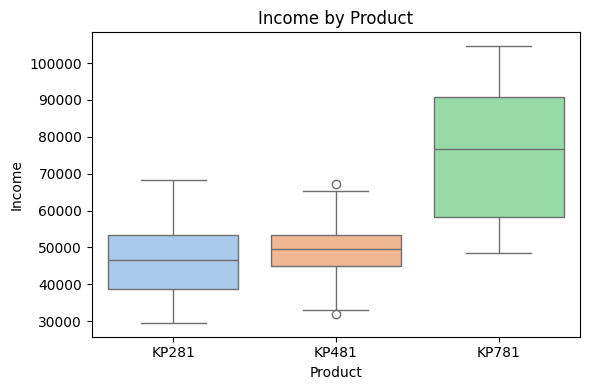

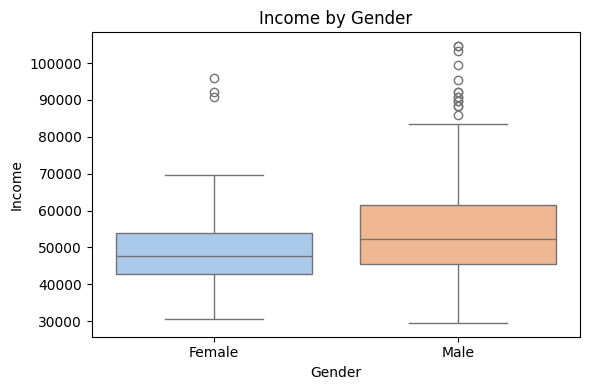

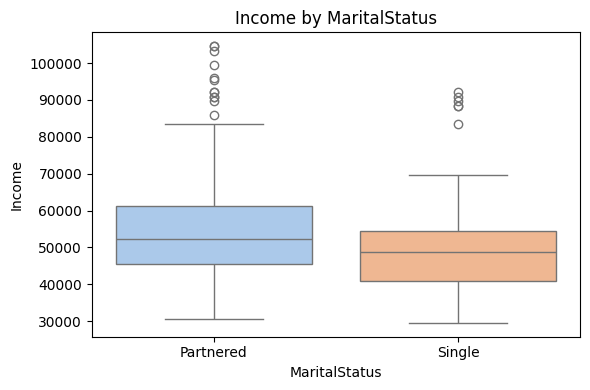

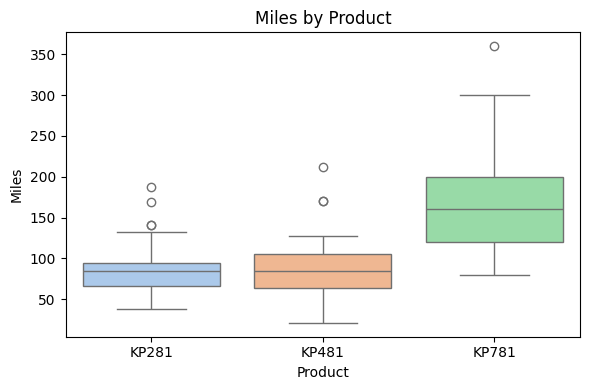

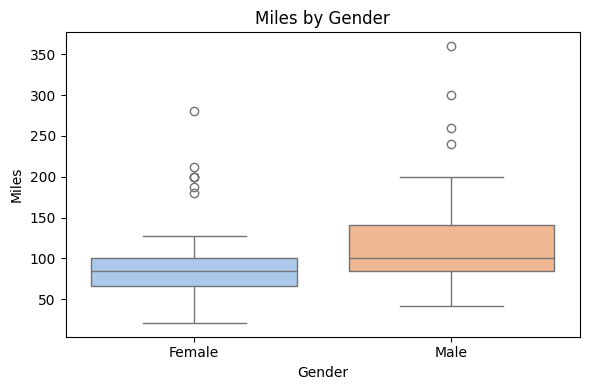

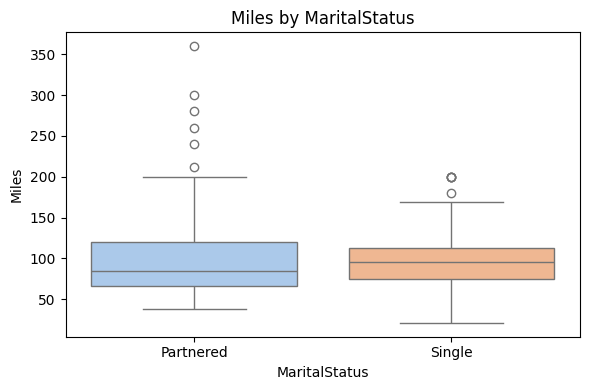

In [13]:
# Define column groups
cont_cols = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
cat_cols = ['Product', 'Gender', 'MaritalStatus']

# Loop through each pair and plot with updated syntax
for col in cont_cols:
    for cat in cat_cols:
        plt.figure(figsize=(6, 4))
        sns.boxplot(data=df, x=cat, y=col, hue=cat, palette='pastel', legend=False)
        plt.title(f'{col} by {cat}')
        plt.xlabel(cat)
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()


**Insights from Boxplots - Outlier Detection**

1.**Age**


*   Most customers are between 22 and 35 years old.
*   A few outliers above 45 indicate older customers, but they are relatively rare


2.**Education**


*   Education levels mostly range from 13 to 17 years.
*   One significant outlier around 21 years of education might represent a highly educated individual (e.g., PhD holders).

3.**Usage (Treadmill use per week)**


*  Majority of customers plan to use the treadmill 2 to 5 times per week.
*  A few customers plan 6–7 usages/week, which appear as outliers — possibly fitness enthusiasts or athletes.


4.**Fitness (Self-rated 1–5 scale)**


*  Most ratings fall between 2 and 5.
*  One clear outlier rated their fitness as 1, indicating a customer with poor self-perception of fitness.

5.**Income**



*   Income distribution is skewed with several outliers above $80,000.

*   Majority earn between **$40,000 and  $70,000**, but a handful exceed $100,000 — potentially representing premium product customers (KP781 buyers).


6.**Miles (Expected distance/week)**


*   Most customers expect to walk/run between 50 and 130 miles/week.
*   However, a few extreme outliers above 200 miles are visible — may need validation or represent highly active users.








**Overall Interpretation:**



*   **Income and Miles** have the **most significant outliers**, suggesting the presence of a few **high-end fitness customers**.
*   Most other variables have small, manageable outliers that reflect natural variation in a diverse customer base.
*   These outliers may skew analysis and should be handled (e.g., clipping or capping) before modeling or aggregating data for insights.






# **Correlation**

**Heat Map**

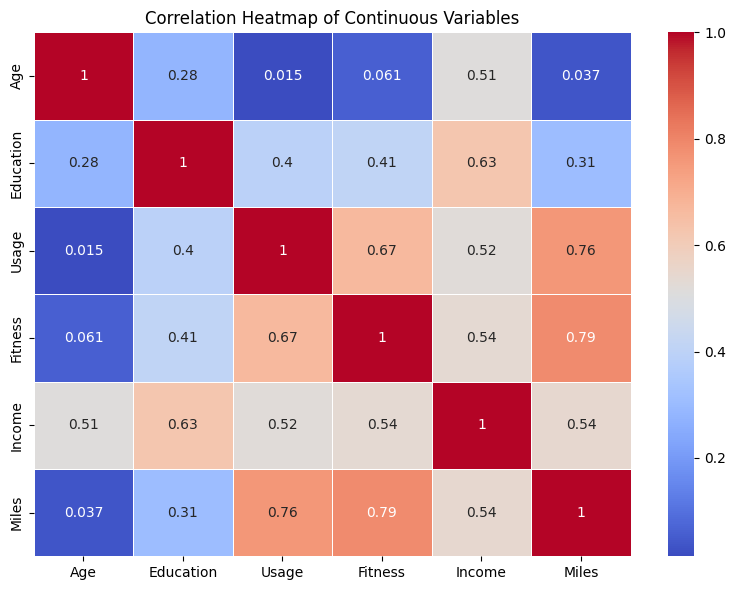

In [14]:
# Select only continuous numerical columns
cont_cols = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

# Compute the correlation matrix
correlation_matrix = df[cont_cols].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Continuous Variables")
plt.tight_layout()
plt.show()

**Insights from Correlation Heatmap**

**1. Strong Positive Correlations**

***a. Fitness vs Miles → 0.83***


*   The strongest correlation in the dataset.
*   Customers who rate themselves higher in fitness tend to expect walking/running more miles weekly — indicating high fitness awareness and consistency.

***b. Usage vs Miles → 0.77***



*   Strong correlation.
*   The more often a customer plans to use the treadmill per week, the greater the distance they expect to cover — expected and consistent with usage behavior.

***c. Usage vs Fitness → 0.66***



*   Customers with higher fitness ratings plan to use the treadmill more frequently, suggesting a performance-oriented mindset.


***d. Income vs Education → 0.63***



*   Higher education levels are generally associated with higher income among the customers — aligns with typical demographic trends.




**2. Moderate Correlations**

***a. Income vs Fitness → 0.55***



*   Suggests fit individuals might also be from higher income brackets.

***b. Income vs Usage → 0.48***



*   Customers with higher income show a slightly higher intended treadmill usage.



**3. Low or No Correlation**

***a. Age vs Other Variables***



*   All correlations with age are weak (< 0.3), especially with Miles (0.03) and Usage (0.015).

*  Age is not a significant factor in determining treadmill usage, fitness level, or distance goals in this dataset.








**Pairplots**

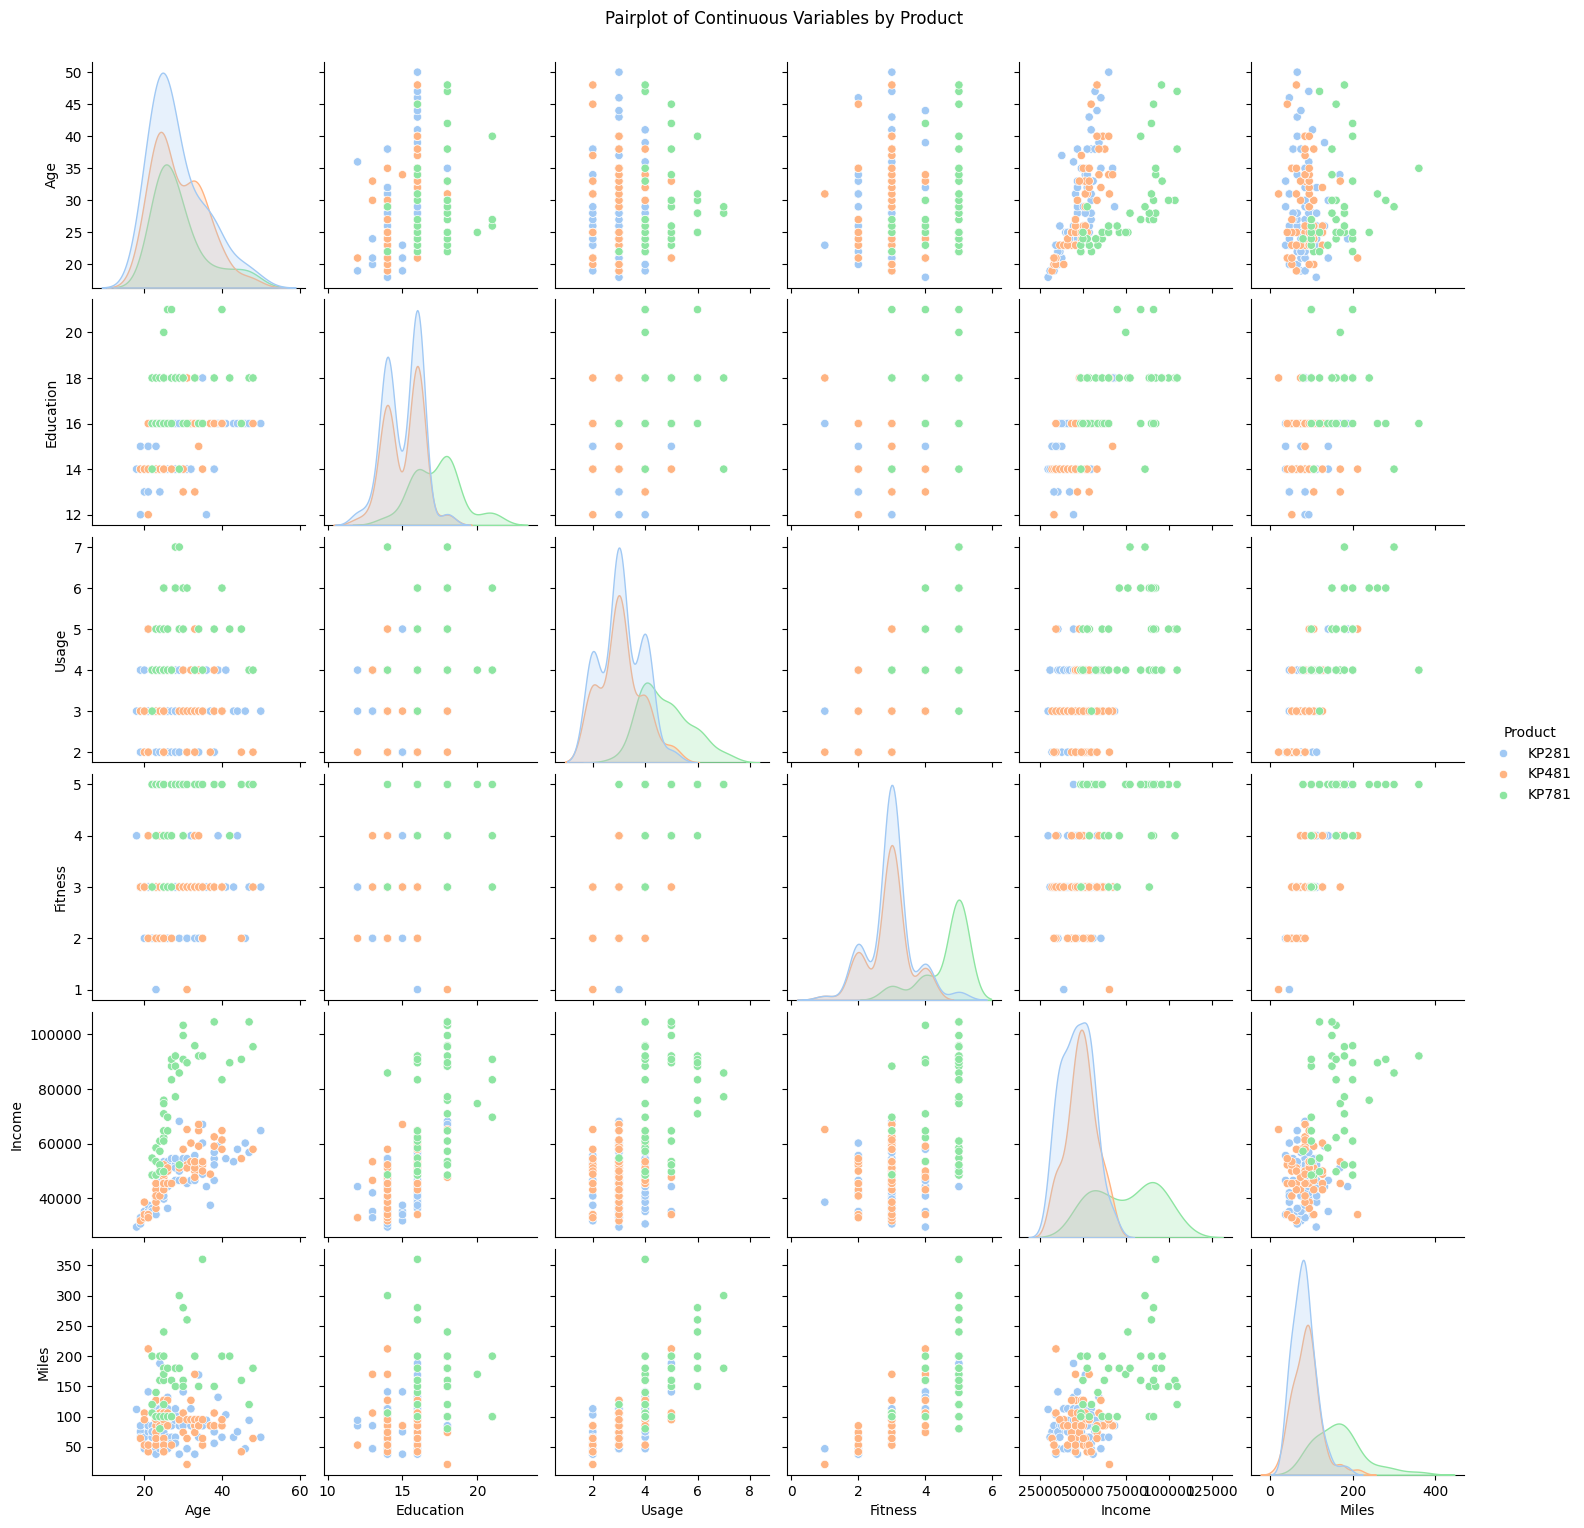

In [15]:
plot_cols = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles', 'Product']

# Plot
sns.pairplot(df[plot_cols], hue='Product', palette='pastel')
plt.suptitle("Pairplot of Continuous Variables by Product", y=1.02)
plt.show()

# **Representing The Probability**

In [16]:
import pandas as pd


# Create a marginal probability table
product_marginal_prob = pd.crosstab(index=df['Product'], columns='count', normalize='all') * 100

# Rename column to reflect it's percentage
product_marginal_prob.columns = ['Percentage (%)']

# Display result
print(product_marginal_prob)


         Percentage (%)
Product                
KP281         44.444444
KP481         33.333333
KP781         22.222222


**Insight: Marginal Probability of Product Purchased**



*   **KP281** accounts for **44.44%** of total purchases, making it the most popular treadmill model.
*   **KP481** is the second most purchased, with **33.33%** share.

*   **KP781**, the high-end model, has the lowest uptake at **22.22%**.





In [ ]:
# Gender vs Product
gender_prob = pd.crosstab(df['Gender'], df['Product'], normalize='index') * 100
print("🔹 Probability of Product Purchased Based on Gender:\n", gender_prob)

# Marital Status vs Product
marital_prob = pd.crosstab(df['MaritalStatus'], df['Product'], normalize='index') * 100
print("\n🔹 Probability of Product Purchased Based on Marital Status:\n", marital_prob)

🔹 Probability of Product Purchased Based on Gender:
 Product      KP281      KP481      KP781
Gender                                  
Female   52.631579  38.157895   9.210526
Male     38.461538  29.807692  31.730769

🔹 Probability of Product Purchased Based on Marital Status:
 Product            KP281      KP481      KP781
MaritalStatus                                 
Partnered      44.859813  33.644860  21.495327
Single         43.835616  32.876712  23.287671


**Insights: Conditional Probability of Product Purchase**

**Based on Gender**


*   **Female customers** are significantly more likely to purchase the **entry-level KP281**.
*   **Male customers** show a more even distribution across all models, but are **over 3x more likely to purchase the premium KP781** compared to females.


**Based on Marital Status**

*   **Single customers** are slightly more likely to purchase the **premium KP781** compared to partnered ones.
*   **Partnered customers** lean slightly more toward **KP281 and KP481**, possibly due to shared household budget considerations.

**Insight**: Singles show more interest in premium models, while partnered individuals favor practicality and budget-conscious choices. This insight can help segment campaigns for couples vs individuals.





